In [ ]:
def take_avg(x, y, i_mol):
    x = x * i_mol / 300  ## Conversion of uL to mol!
    
    combined_data = pd.DataFrame({'x': x, 'y': y})
    
    # Check if any x-values repeat
    if combined_data['x'].duplicated().any():
        averaged_data = combined_data.groupby('x', as_index=False).mean()
        return averaged_data['x'], averaged_data['y']
    else:
        # No repeats = just return original order
        return combined_data['x'], combined_data['y']


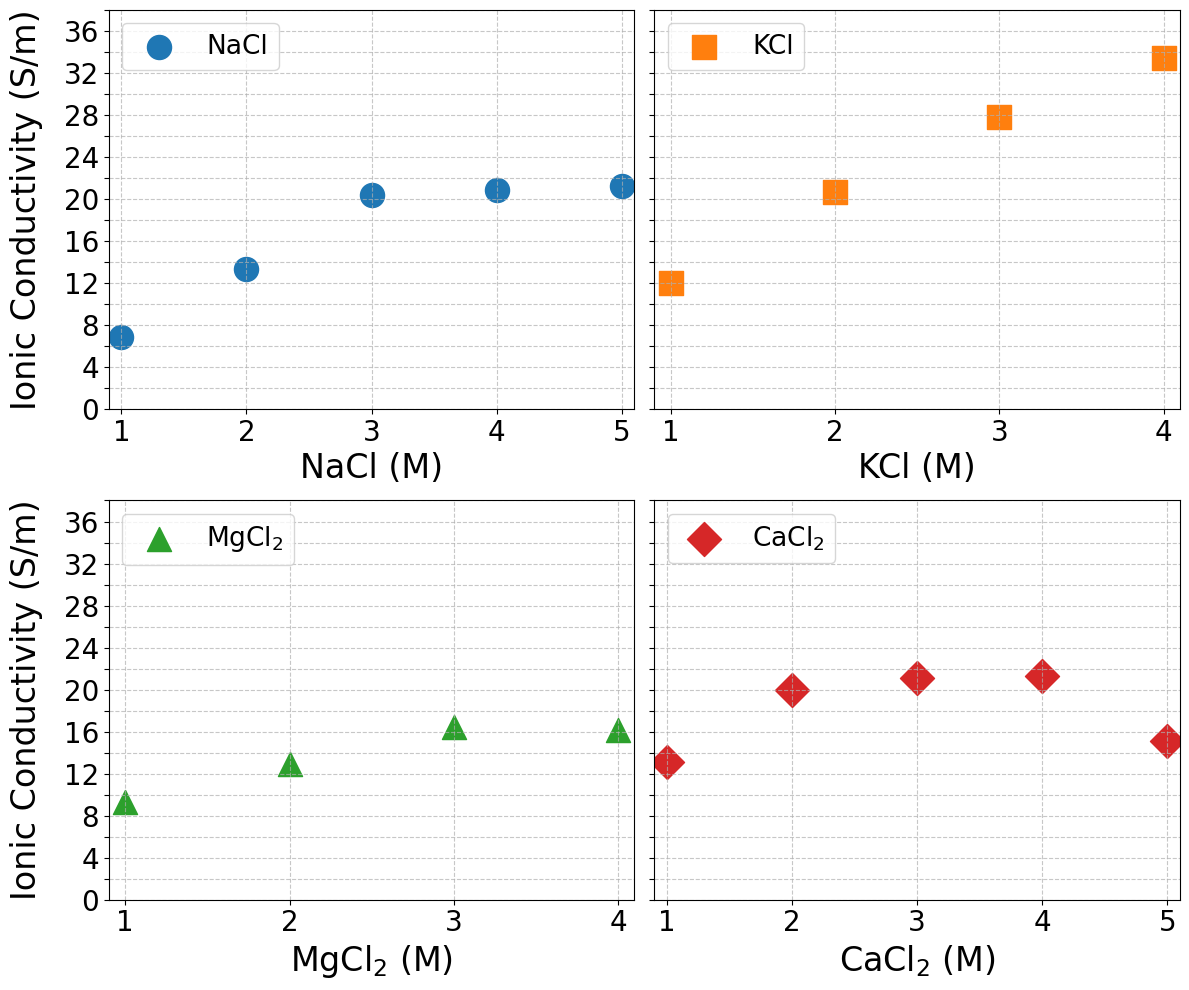

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10), sharey=True)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
markers = ['o', 's', '^', 'D', 'v', 'p', '*']
data = pd.read_csv('./individ_data.csv')

salt_data = {
    'NaCl': {'x_col': 0, 'rows': slice(0, 5)},
    'KCl': {'x_col': 1, 'rows': slice(5, 9)},
    r'MgCl$_2$': {'x_col': 2, 'rows': slice(9, 13)},
    r'CaCl$_2$': {'x_col': 3, 'rows': slice(13, 18)}
}

d = []
for i, (salt, details) in enumerate(salt_data.items()):
    row = i // 2
    col = i % 2

    ax = axes[row, col]

    x = data.iloc[details['rows'], details['x_col']]
    y = data.iloc[details['rows'], 4]
    i_mol = 5 if i in (0, 3) else 4
    x, y = take_avg(x, y, i_mol)

    ax.scatter(x, y, label=salt, 
               color=colors[i % len(colors)], 
               marker=markers[i % len(markers)], 
               s=300)
    ax.set_xlabel(f'{salt} (M)', fontsize=24)

    if col == 0:
        ax.set_ylabel('Ionic Conductivity (S/m)', fontsize=24, labelpad=15)

    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend(fontsize=19, loc = 'upper left')

    ax.set_xticks([1, 2, 3, 4, 5])


    if i in (0, len(salt_data) - 1):  
        ax.set_xlim(0.9, 5.1)
    else:
        ax.set_xlim(0.9, 4.1)

    ax.tick_params(axis='both', labelsize=20)
    d.append(y)

plt.tight_layout()
for ax in axes.flat:
    yticks = np.arange(0, 40, 2)
    ax.set_yticks(yticks)
    ax.set_yticklabels([str(t) if t % 4 == 0 else '' for t in yticks])
plt.show()


In [86]:
print(d)

[0     6.859368
1    13.324230
2    20.383378
3    20.825797
4    21.268215
Name: y, dtype: float64, 5    12.010130
6    20.691140
7    27.793629
8    33.398595
Name: y, dtype: float64, 9      9.286496
10    12.963155
11    16.459054
12    16.176873
Name: y, dtype: float64, 13    13.133806
14    19.987340
15    21.131917
16    21.273209
17    15.126570
Name: y, dtype: float64]
